In [3]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install openpyxl

In [7]:
data_2019 = 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx'
df = pd.read_excel(data_2019)
df

,VIAS-baannr,Wegnr_van,Ri_van,Hec_letter_van,Hm_van,Baantype_van,Traject_van,Wegnr_naar,Ri_naar,Hec_letter_naar,...,OS_L2,OS_L3,OS_vrachtperc,AS_AL,AS_L1,AS_L2,AS_L3,AS_vrachtperc,etmaal_AL_vorig_jaar,etmaal_AL_verschil
0,15,1.0,L,c,45712,PST,Kp Hoevelaken,1.0,L,c,...,74,23,9,876,833,33,10,5,5618,782
1,6040,1.0,L,z,3405,PST,A1,1.0,L,z,...,62,34,11,1013,960,26,27,5,6786,114
2,6078,1.0,L,NaN,3405,HR,Amsterdam-Watergraafsmeer,1.0,L,NaN,...,420,153,9,4593,4341,177,75,5,39137,1063
3,6080,1.0,L,NaN,3902,HR,Kp Watergraafsmeer,1.0,L,NaN,...,485,187,9,5653,5354,201,99,5,45972,1428
4,6081,1.0,R,NaN,4136,HR,Ringweg-Oost,1.0,R,NaN,...,370,178,11,8083,7549,423,111,7,46254,1146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,65011,15.0,R,b,159658,OPR,ELST 38,NaN,R,b,...,26,18,20,336,305,19,13,9,1974,26
8766,67243,12.0,R,NaN,149753,HR,Rijksweg A12,NaN,R,NaN,...,128,258,22,2639,2186,146,307,17,19791,-1091
8767,81191,7.0,R,a,199153,AFR,Groningen-Zuidoost,NaN,NaN,NaN,...,34,17,3,988,924,31,33,6,9829,-1179
8768,81194,7.0,R,a,199134,AFR,Groningen-Zuidoost,NaN,NaN,NaN,...,34,17,3,988,924,31,33,6,9829,-1179


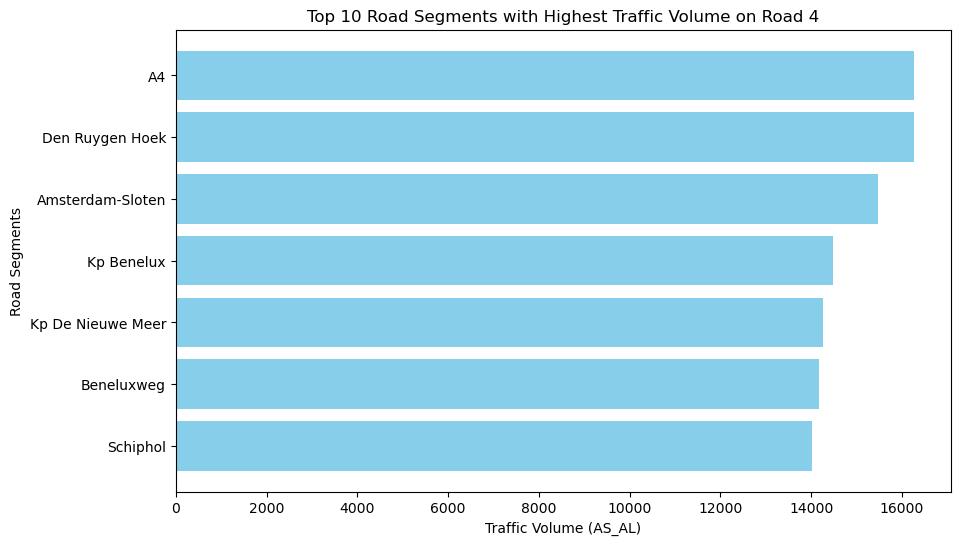

In [21]:
df_road_4 = df[(df['Wegnr_van'] == 4) & (df['Wegnr_naar'] == 4)] 

df_road_4_sorted = df_road_4.sort_values(by='AS_AL', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df_road_4_sorted['Traject_van'].head(10), df_road_4_sorted['AS_AL'].head(10), color='skyblue')
plt.xlabel('Traffic Volume (AS_AL)')
plt.ylabel('Road Segments')
plt.title('Top 10 Road Segments with Highest Traffic Volume on Road 4')
plt.gca().invert_yaxis()
plt.show()

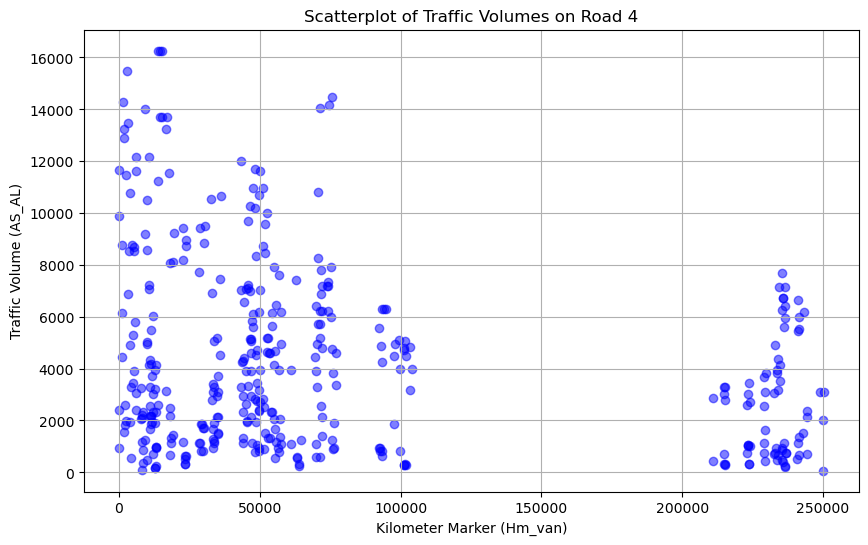

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df_road_4['Hm_van'], df_road_4['AS_AL'], color='blue', alpha=0.5)
plt.xlabel('Kilometer Marker (Hm_van)')
plt.ylabel('Traffic Volume (AS_AL)')
plt.title('Scatterplot of Traffic Volumes on Road 4')
plt.grid(True)
plt.show()

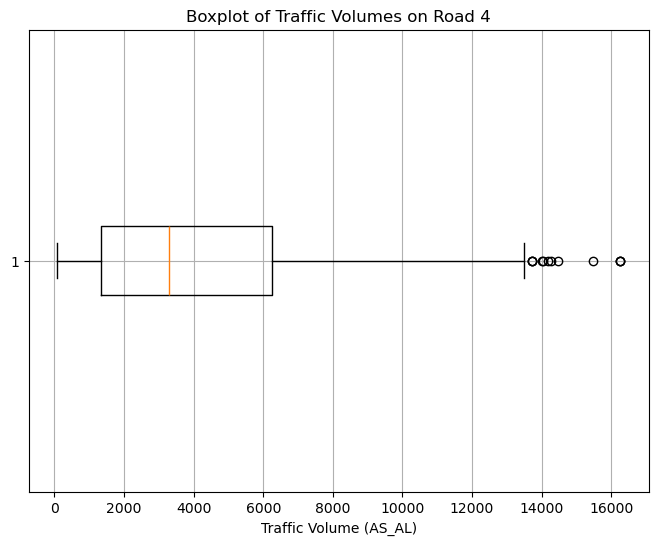

In [22]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_road_4['AS_AL'], vert=False)
plt.xlabel('Traffic Volume (AS_AL)')
plt.title('Boxplot of Traffic Volumes on Road 4')
plt.grid(True)
plt.show()

In [23]:
print(df_road_4.OS_AL.max())

19663


In [24]:
df_exceeding_threshold = df_road_4[df_road_4['AS_AL'] > 6600]

mean_traffic = df_exceeding_threshold['AS_AL'].mean()
std_traffic = df_exceeding_threshold['AS_AL'].std()
distribution = df_exceeding_threshold['AS_AL'].describe()

print("Mean Traffic Volume for Segments Exceeding 6600:", mean_traffic)
print("Standard Deviation of Traffic Volume for Segments Exceeding 6600:", std_traffic)
print("Distribution of Traffic Volumes for Segments Exceeding 6600:")
print(distribution)

Mean Traffic Volume for Segments Exceeding 6600: 9870.954545454546
Standard Deviation of Traffic Volume for Segments Exceeding 6600: 2644.954910895223
Distribution of Traffic Volumes for Segments Exceeding 6600:
count       88.000000
mean      9870.954545
std       2644.954911
min       6655.000000
25%       7554.750000
50%       9197.000000
75%      11610.000000
max      16263.000000
Name: AS_AL, dtype: float64
